<a href="https://colab.research.google.com/github/codeBall01/PHY386/blob/Bodes-Galaxy/2025/Final/codeBall01/bodes_galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch


# Tasks 1 and part of 3



Stretched image
Image with sky coordinates


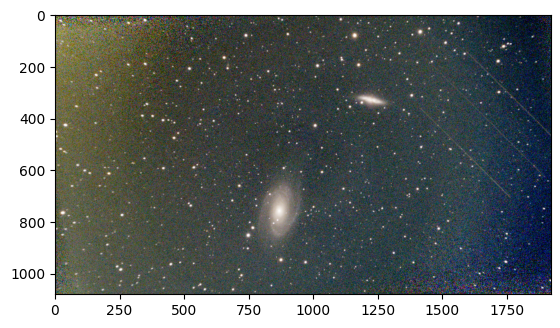

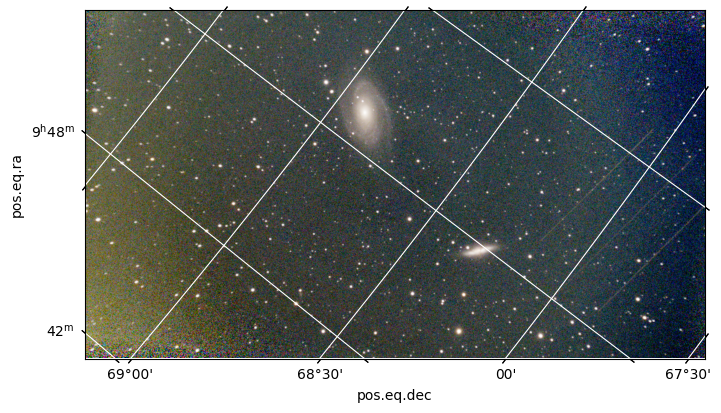

In [79]:
import requests
from astropy.io import fits
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from auto_stretch import apply_stretch
from astropy.wcs import WCS


fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/Homework2025/2025/HW/codeBall01/Stacked_878_M%2081_10.0s_IRCUT_20250311-011812.fit"

# Fetch the FITS file from the GitHub repository
response = requests.get(fits_url)
response.raise_for_status()  # Check for request errors

hdul = fits.open(BytesIO(response.content))

# Assume the first extension contains an RGB image in (3, Height, Width) format
rgb_data = np.transpose(hdul[0].data, (2, 1, 0))  # Shape should be (3, Height, Width)
hdul.close() #

# Display the image
print("Stretched image")
fig = plt.figure()
plt.imshow(apply_stretch(rgb_data))


fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(apply_stretch(rgb_data), origin='lower')
ax.coords.grid(color='white', ls='solid')
wcs = WCS(hdul[0].header, naxis=2)
print("Image with sky coordinates")


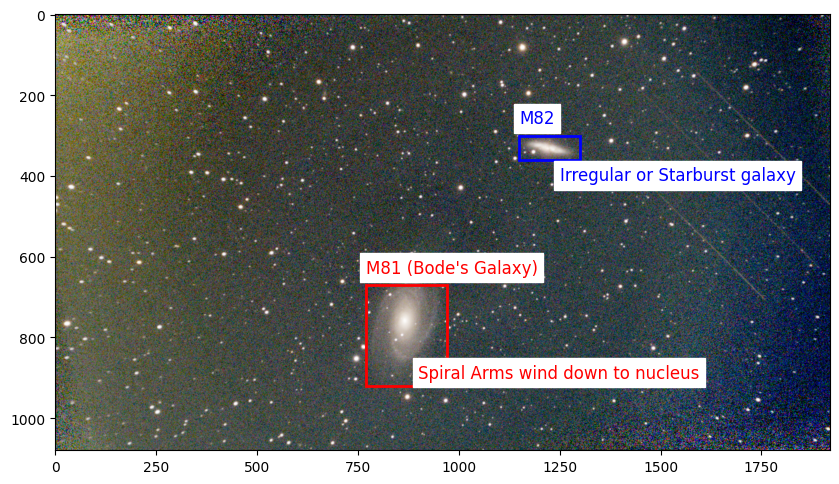

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(apply_stretch(rgb_data))

# First box and label
rect1 = patches.Rectangle((770, 670), 200, 250, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.text(770, 640, "M81 (Bode's Galaxy)", color='r', fontsize=12, backgroundcolor='white')
ax.text(900, 900, "Spiral Arms wind down to nucleus", color='r', fontsize=12, backgroundcolor='white')

# Second box and label
rect2 = patches.Rectangle((1150, 300), 150, 60, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
ax.text(1150, 270, 'M82', color='b', fontsize=12, backgroundcolor='white')
ax.text(1250, 410, 'Irregular or Starburst galaxy', color='b', fontsize=12, backgroundcolor='white')

plt.show()


NCG 3077 has sky coords:

Position (RA):	10 3 21.45
Position (Dec):	68° 44' 3.26"

which means it is out of frame for this image


M81 total flux: 20956492.320194863
M82 total flux: 5304298.68605954


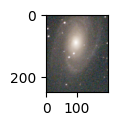

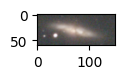

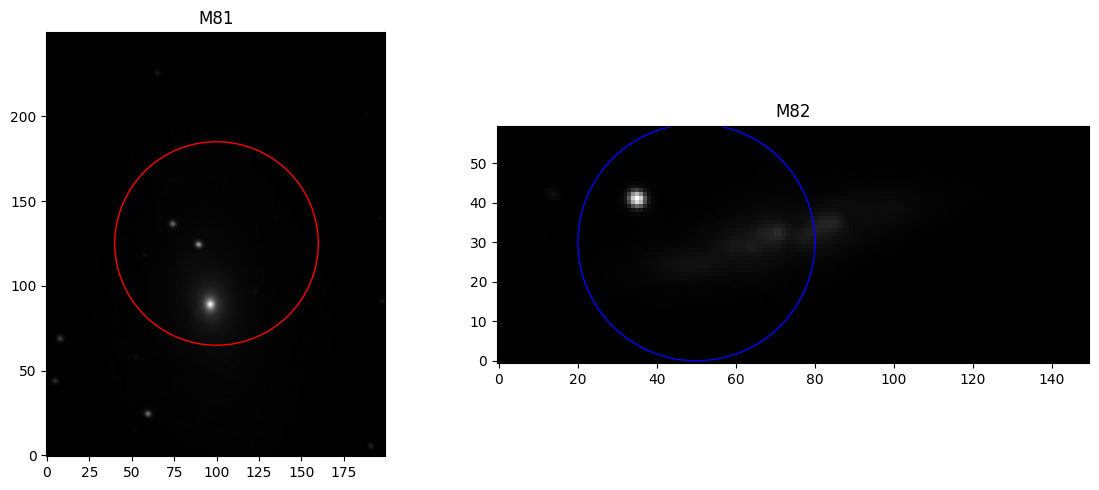

In [85]:
# Crop around M81 (approx coordinates and size from your earlier box)
m81_crop = rgb_data[670:670+250, 770:770+200, :]  # (y1:y2, x1:x2)

# Crop around M82
m82_crop = rgb_data[300:300+60, 1150:1150+150, :]  # (y1:y2, x1:x2)

fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(apply_stretch(m81_crop))
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(apply_stretch(m82_crop))

def to_grayscale(rgb):
    # Simple average over RGB channels
    return np.mean(rgb, axis=2)

m81_gray = to_grayscale(m81_crop)
m82_gray = to_grayscale(m82_crop)

from photutils.aperture import CircularAperture, aperture_photometry

# Define aperture positions (x, y) within cropped regions
m81_position = [(100, 125)]  # center of 200x250 box
m82_position = [(75, 30)]    # center of 150x60 box

# Adjusted aperture centers
m81_position = [(100, 125)]  # Still good
m82_position = [(50, 30)]    # Move aperture left a bit

m81_aperture = CircularAperture(m81_position, r=60)
m82_aperture = CircularAperture(m82_position, r=25)  # Slightly smaller radius to avoid that bright star



# Define aperture radius in pixels
m81_aperture = CircularAperture(m81_position, r=60)
m82_aperture = CircularAperture(m82_position, r=30)

# Run aperture photometry
m81_result = aperture_photometry(m81_gray, m81_aperture)
m82_result = aperture_photometry(m82_gray, m82_aperture)

print("M81 total flux:", m81_result['aperture_sum'][0])
print("M82 total flux:", m82_result['aperture_sum'][0])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(m81_gray, cmap='gray', origin='lower')
m81_aperture.plot(color='red', ax=axs[0])
axs[0].set_title("M81")

axs[1].imshow(m82_gray, cmap='gray', origin='lower')
m82_aperture.plot(color='blue', ax=axs[1])
axs[1].set_title("M82")

plt.tight_layout()
plt.show()


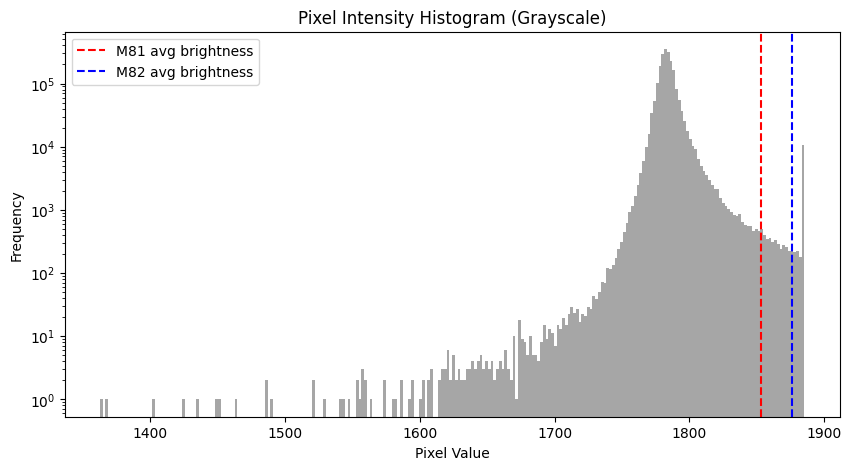

In [86]:
# Convert to grayscale (average of RGB channels)
def to_grayscale(rgb):
    return np.mean(rgb, axis=2)

gray_img = to_grayscale(rgb_data)

# Clip the grayscale data to ignore extreme high values (e.g., stars)
clipped = np.clip(gray_img, a_min=0, a_max=np.percentile(gray_img, 99.5))

# Recompute aperture brightness
m81_avg_brightness = m81_result['aperture_sum'][0] / m81_aperture.area
m82_avg_brightness = m82_result['aperture_sum'][0] / m82_aperture.area

# Plot histogram and brightness markers
plt.figure(figsize=(10, 5))
plt.hist(clipped.ravel(), bins=256, color='gray', alpha=0.7)
plt.axvline(m81_avg_brightness, color='r', linestyle='--', label="M81 avg brightness")
plt.axvline(m82_avg_brightness, color='b', linestyle='--', label="M82 avg brightness")
plt.title("Pixel Intensity Histogram (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.yscale('log')
plt.show()


## Task 2


##A Quick Background on Bode's Galaxy:

 In 1774 the German astronomer Johann Elert Bode first discovered this galaxy. This galaxy is one of the brightest in the night sky (northern hemisphere) and is perfect for ameurature astronomers. It's also a part of the Messier's Catalog and known as M81. Moreover, there is a black hole of 70 million solar masses at it's center.

M81 and M82 (The Bode's Galaxy and the Cigar Galaxy) are gravitionally locked and effect the compostion and shape of each other. It is likely that gravitational effects from M82 contriubted to the development of the spiral arms of M81. Furthermore, from the gravitional effects of M81, M82 was left with violent star forming regions that cause it to glow in x-rays.


## Measuring Stellar Temperatures

Wien's Law relates the temperature of a "block body" or star and the wavelengths of light it will radiate. This means by measuring the "color" of stars, their temperature can be determined. One such way of measuring color of stars is by using filters and measuring the brightness of light after passing through the filter. Commonly, filters of ultraviolet, blue and visiable (yellow) light are used. To classify stars and their relative temperatures the color inidce of B-V is used; B-V comares the different in magnitude of the brigthness of the blue minus the visible for a star.

## Star Classification
There are many ways in which stars are classified, from the Harvard spectral classification system to luminocity classes. To classify stars, color indices help to give information on the temperature of the star. For example, in the Harvard spectral classification, M - type stars are the coolest while O - type stars are the hottest.

## Nebula Emission Lines
Similar to stars, nebulas also have emission an emission spectra. Depending on the composition of the nebula, the surrounding envirnment, and the distance away, these emission spectra will vary. One common example is when a nebula with an abundance of neutral hydrogen atoms is ionized by a nearby O or B star. When the protons and electrons recombine they are in an excited state. Once the electron drops back to its lower energy state it emmits a photon of a specific wavelength. For visible light, the most common of these wavelengths is red, which gives hydrogen filled nebula their iconic red color.



## Task 3 Continued


# Morphology of the galaxies

## M81
The inner buldge of and nuclei are relatively structure free. Within the spiral arms are regions of star formation, with many hot blue stars having already formed.

## M82
Hosts a starburst nuclei, and has a bar running along it's major axis visible in the infrared. M82 is characterized by it's amorphous distribution of light and is a protoype of the Irr II class of galaxy.


## NGC 3077 (Not pictured)
Is often classified as a spirla galaxy however is believed to have a turbulent past which may have led to a mophology change. There are many tendrils of ionized hydrogen emanating outward from its core.


# Task 4

In [90]:
#Using the data from Tasks 1 and 3, total luminosity is computed


# Estimate sky background using an area without galaxy
background_m81 = np.median(m81_gray[0:20, 0:20])
background_m82 = np.median(m82_gray[0:20, 0:20])

# Get aperture areas
m81_area = m81_aperture.area
m82_area = m82_aperture.area

# Subtract estimated background contribution
m81_luminosity = m81_result['aperture_sum'][0] - background_m81 * m81_area
m82_luminosity = m82_result['aperture_sum'][0] - background_m82 * m82_area

print("M81 net luminosity:", m81_luminosity)
print("M82 net luminosity:", m82_luminosity)

luminosity_ratio = m81_luminosity / m82_luminosity
print(f"M81 is {luminosity_ratio:.2f} times brighter than M82.")



M81 net luminosity: 795007.306517005
M82 net luminosity: 255445.13247538358
M81 is 3.11 times brighter than M82.


In [93]:
y_m81, x_m81 = 125, 100  # center of crop (height=250, width=200)


In [94]:
def radial_profile(data, center, max_radius=None, binsize=1):
  def radial_profile(data, center, max_radius=None, binsize=1):
    """
    Compute the azimuthally averaged radial surface brightness profile of a 2D image.

    Parameters:
    -----------
    data : 2D ndarray
        Grayscale image array (e.g., galaxy image) with pixel intensities.
    center : tuple of int (x, y)
        Coordinates of the center of the profile (in pixels).
    max_radius : int, optional
        Maximum radius (in pixels) to compute the profile. Defaults to the largest radius
        that fits within the image if not specified.
    binsize : int, optional
        Width of each radial bin in pixels. Default is 1 pixel.

    Returns:
    --------
    radial_mean : 1D ndarray
        Array of mean surface brightness values in each radial bin (from center outward).
        Length corresponds to `max_radius` (or the actual number of bins used).
    """

    y, x = np.indices(data.shape)
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    if max_radius is None:
        max_radius = int(r.max())

    r = r.astype(np.int32)
    radial_mean = np.zeros(max_radius)
    for i in range(max_radius):
        mask = (r >= i) & (r < i + binsize)
        if np.any(mask):
            radial_mean[i] = np.mean(data[mask])
        else:
            radial_mean[i] = np.nan  # Avoid divide-by-zero if no pixels in bin
    return radial_mean


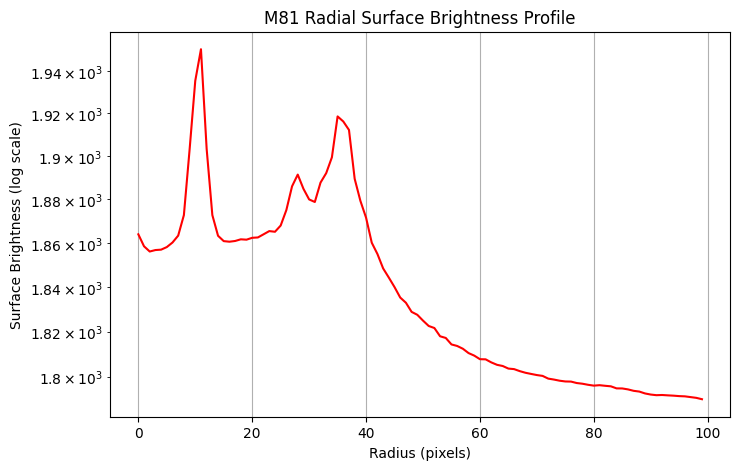

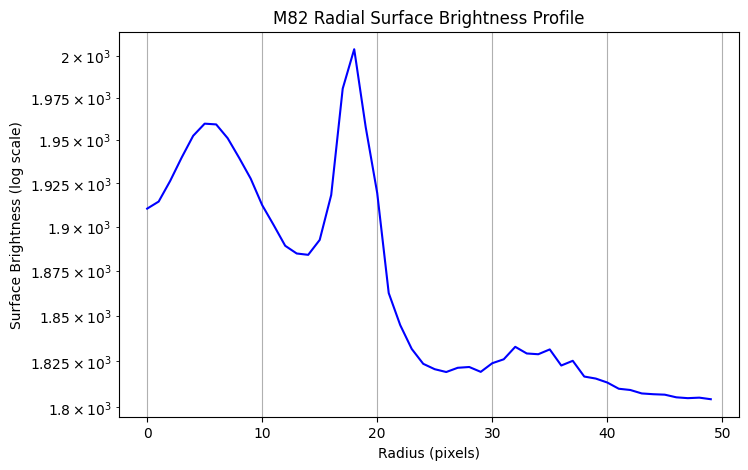

In [97]:
m81_profile = radial_profile(m81_gray, center=(x_m81, y_m81), max_radius=100)

plt.figure(figsize=(8, 5))
plt.plot(m81_profile, color='red')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M81 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()

y_m82, x_m82 = 30, 50
m82_profile = radial_profile(m82_gray, center=(x_m82, y_m82), max_radius=50)

plt.figure(figsize=(8, 5))
plt.plot(m82_profile, color='blue')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M82 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()

